# Data Analyze

To process data properly, we need to analyze data


# Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Process Data

Frist, read CSV file and process it. Generate User-item pairs.


In [2]:
csv = pd.read_csv('../data/json_parsed.csv')

# Since pandas writes list as string, retrieve them
csv['links'] = csv.links.apply(lambda x: ast.literal_eval(x)[0])
csv['contributors'] = csv.contributors.apply(lambda x: ast.literal_eval(x)[0])
csv['category'] = csv.category.apply(lambda x: ast.literal_eval(x)[0])
csv['category_length'] = csv.category.apply(lambda x: len(x))
csv['link_length'] = csv.links.apply(lambda x: len(x))
redirect = csv[(csv.link_length == 1) & (csv.text.str.contains('redirect'))]

relink = {}

for index, row in redirect.iterrows():
    relink[row['title']] = row['links'][0]

diction = {}
category_transformer = {}
i = 0

for index, row in csv.iterrows():
    link = relink.get(row['title'])
    if link:
        # Since there are secondary redirected documents, explore non-redirect document
        while relink.get(link) is not None:
            if link == relink.get(link):
                break
            link = relink.get(link)

        if diction.get(link):
            diction[link].extend(row['contributors'])
        else:
            diction[link] = row['contributors']

        if category_transformer.get(link):
            category_transformer[link].extend(row['category'])
        else:
            category_transformer[link] = row['category']

    else:
        if diction.get(row['title']):
            diction[row['title']].extend(row['contributors'])
        else:
            diction[row['title']] = row['contributors']

        if category_transformer.get(row['title']):
            category_transformer[row['title']].extend(row['category'])
        else:
            category_transformer[row['title']] = row['category']

    i += 1

    if (i % 10000 == 0):
        print(f"processed {i}")

print('process done')

#processed = mpPandasObj(process_contributors, csv, numThreads=process_num, relink=relink)
#processed = pd.DataFrame(list(processed.items()), columns=['title', 'contributors'])
processed = pd.DataFrame(list(diction.items()), columns=['title', 'contributors'])
#processed['title'] = processed.title.apply(lambda x : category_transformer[x])

processed = processed.explode('contributors')

contributor_count = processed.groupby('title').count()
doc_count = processed.groupby('contributors').count()

processed 10000
processed 20000
processed 30000
processed 40000
processed 50000
processed 60000
processed 70000
processed 80000
processed 90000
processed 100000
processed 110000
processed 120000
processed 130000
processed 140000
processed 150000
processed 160000
processed 170000
processed 180000
processed 190000
processed 200000
processed 210000
processed 220000
processed 230000
processed 240000
processed 250000
processed 260000
processed 270000
processed 280000
processed 290000
processed 300000
processed 310000
processed 320000
processed 330000
processed 340000
processed 350000
processed 360000
processed 370000
processed 380000
processed 390000
processed 400000
processed 410000
processed 420000
processed 430000
processed 440000
processed 450000
processed 460000
processed 470000
processed 480000
processed 490000
processed 500000
processed 510000
processed 520000
processed 530000
processed 540000
processed 550000
processed 560000
processed 570000
processed 580000
processed 590000
proces

# Data description

Simple description of data. We can check mean, std and qunatiles.


In [3]:
contributor_count = contributor_count.sort_values('contributors' ,ascending=False)

contributor_count.head(10)

,contributors
title,
대한민국,2895
오락실/서울,2874
야스오(리그 오브 레전드),2847
D.Va,2613
오락실/경기/남부,2529
청해진해운 세월호 침몰 사고,2495
홍진호,2476
고양이,2395
북한,2347


Top 10 documents that are modified frequently. 

In [ ]:
contributor_count.describe()

,contributors
count,573334.000000
mean,42.142931
std,84.274899
min,1.000000
25%,7.000000
50%,16.000000
75%,41.000000
max,2895.000000


In [ ]:
doc_count = doc_count.sort_values('title' ,ascending=False)

doc_count.head(10)

,title
contributors,
namubot,308148
kiwitree2,283390
samduk,131879
albert_einstein,60745
owb101,41000
korhermit,37868
e080hsm,37528
49.163.93.241,26566
general9753,25977


Top 10 contributors. First and second are bots. After third is human. So we can see that the greatest contributor is samduk

In [ ]:
doc_count.describe()

,title
count,2.077510e+06
mean,1.163026e+01
std,3.376847e+02
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,4.000000e+00
max,3.081480e+05


## Histogram


array([[<AxesSubplot:title={'center':'contributors'}>]], dtype=object)

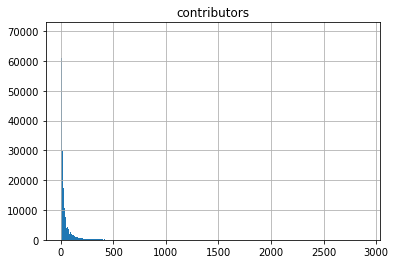

In [15]:
contributor_count.hist(bins=1000)

array([[<AxesSubplot:title={'center':'title'}>]], dtype=object)

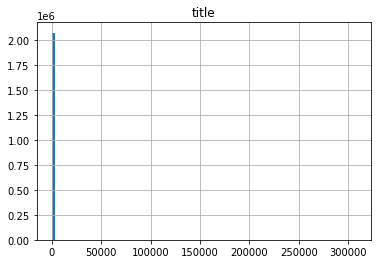

In [19]:
doc_count.hist(bins=100)

In [3]:
# To Pad categorical features, check max num of category of document

csv['category_length'].describe()

count    867023.000000
mean          1.579327
std           2.122671
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          42.000000
Name: category_length, dtype: float64

In [4]:
csv.sort_values('category_length' ,ascending=False).head(10)

,title,text,category,links,contributors,category_length,link_length
87042,마이클 J. 폭스,할리우드 명예의 거리 입성자 이름 마이클 J. 폭스 MICHAEL J FOX 분야...,"[1961년 출생, 1976년 데뷔, 2020년 은퇴, 미국으로 귀화한 인물, 미국...","[스튜어트 리틀, 6월 9일, 백 투 더 퓨처 시리즈, 동안, 강수진(KBS 성우)...","[r:canicula, 221.161.137.3, 59.10.174.232, for...",42,46
398461,여운홍,대한민국 국회 대한민국 국회의원 (경기 양평군) 초대 류래완 → 제2대 여운홍 →...,"[친일인명사전 수록자/교육, 학술, 한국의 사회주의 독립운동가, 1891년 출생, ...","[1906년, 우드로 윌슨, 경기도, 1973년, 대한민국 국회, 좌우 합작 운동,...","[116.45.185.184, 116.36.214.187, nicknamemola,...",41,102
853355,조선/왕실,"조선 왕실 관향 전라북도 전주시 창업군주 태조 이성계 중시조 세조, 중종, 인조,...","[조선의 왕족, 전주 이씨 경명군파, 전주 이씨 경창군파, 전주 이씨 계성군파, 전...","[광평대군, 연희궁, 정현왕후, 장경왕후, 효순왕후, 변안열, 이방번, 현숙공주, ...","[bart0130, halfling, cometleeko, mkj3533, 112....",39,354
745644,마틴 쇼트,역대 토니상 시상식 남우주연상 - 뮤지컬 부문 제52회 (1998년) → 제53회...,"[1950년 출생, 1979년 데뷔, 미국의 남가수/ㅁ, 미국의 남배우/ㅁ, 미국의...","[코미디언, 맥마스터 대학교, 프로듀서, 현재, 성우, 2000년, 카바레, 캐나다...","[googol, 119.70.108.247, urrbwhd, kiwitree2]",36,22
542407,세브달리자,Sevdaliza 이름 세브달리자(Sevdaliza) 본명 세브다 앨리자데흐(Se...,"[1987년 출생, 2014년 데뷔, 가수 출신 배우, 네덜란드로 귀화한 인물, 네...","[싱어송라이터, 하나투어, 가수, 펜타포트 락 페스티벌, 트립 합, 테헤란, 일렉트...","[c__c, urrbwhd, 121.138.61.48, wikic, kiwitree...",35,15
624022,오데야 러쉬,오데야 러쉬 אודיה רש ｜ Odeya Rush 본명 오데야 러쉬네크 Odey...,"[1997년 출생, 2010년 데뷔, 러시아계 미국인/ㅇ, 러시아계 유대인/ㅇ, 미...","[2015년, 1997년, 해피 어게인, 2016년, 사랑, 스무살, 배우, 스피닝...","[biobeo, kiwitree5, 99.237.177.85, urrbwhd, ki...",35,29
516842,마이크 마이어스(코미디언),할리우드 명예의 거리 입성자 이름마이크 마이어스 MIKE MYERS 분야영화 입성...,"[1963년 출생, 1975년 데뷔, 복수국적자, 영국계 미국인, 영국계 캐나다인,...","[카녜이 웨스트, 저스틴 팀버레이크, 데미 무어, 바스터즈: 거친 녀석들, 새터데이...","[221.158.252.42, a_004, 121.134.184.110, 121.1...",35,34
139645,스티븐 시걸,스티븐 시걸 Steven Seagal 본명 스티븐 프레데릭 시걸 (Steven F...,"[1952년 출생, 1988년 데뷔, 네덜란드계 미국인/ㅅ, 독일계 미국인/ㅅ, 랜...","[더 키퍼, 2005년, 니 캐핑, 리사 실버맨, 마피아, 세르비아, 아이키도, 하...","[114.76.88.213, 116.41.137.252, iyunmin1586, 1...",35,136
766128,윌 아넷,Will Arnett 본명 윌리엄 에머슨 아넷 (William Emerson Ar...,"[1970년 출생, 1996년 데뷔, 네덜란드계 미국인, 네덜란드계 캐나다인, 미국...","[코미디언, 미국, 프로듀서, 캐나다, 음악가, 배우, 온타리오 주, 작가, 성우,...","[219.248.135.84, 122.36.246.227, cw0323, urrbw...",35,16
81111,루피타 뇽오,역대 아카데미 시상식 여우조연상 제85회 (2013년) → 제86회 (2014년)...,"[1983년 출생, 2005년 데뷔, 멕시코시티 출신 인물, 멕시코의 다큐멘터리 감...","[마즈 카나타, 체스의 여왕, 블랙 팬서(영화), 정글북(영화), 노예 12년(영화...","[sangmin4480, 182.222.90.17, 112.170.175.167, ...",34,50


<AxesSubplot:>

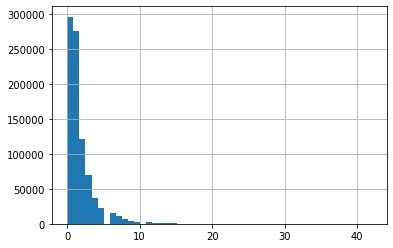

In [7]:
csv['category_length'].hist(bins=50)

In [28]:
csv_cat = pd.DataFrame(csv['category'].explode())
csv_cat['cat_len'] = csv_cat.category.apply(lambda x: len(str(x)))

csv_cat

,category,cat_len
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,2003년 싱글,NaN
...,...,...
867021,2016년 게임/앞서 해보기,NaN
867021,총을 소재로 한 작품,NaN
867021,Windows 게임/라틴 문자,NaN
867022,에이지 오브 엠파이어 3,NaN


In [24]:
csv_cat['cat_len'].describe()

count    1.665015e+06
mean     7.838715e+00
std      4.575101e+00
min      0.000000e+00
25%      3.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      5.480000e+02
Name: category, dtype: float64

In [26]:
csv_cat.sort_values('cat_len', ascending=False).head(10)

C:\Users\KimMinSang\Anaconda3\envs\namu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  """Entry point for launching an IPython kernel.


ValueError: No axis named cat_len for object type Series

In [4]:
csv['link_length'].describe()

count    867023.000000
mean         24.420514
std          63.475945
min           0.000000
25%           1.000000
50%           9.000000
75%          26.000000
max       11231.000000
Name: link_length, dtype: float64

In [5]:
csv.sort_values('link_length' ,ascending=False).head(10)

C:\Users\KimMinSang\Anaconda3\envs\namu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  """Entry point for launching an IPython kernel.


ValueError: No axis named link_length for object type Series